In [1]:
# Sergeeva Anna. Exam project
# Data - Wine Reviews

In [4]:
import pandas

In [102]:
wine=pandas.read_csv("C:/Users/user/Desktop/Machine_learning/winemag-data-130k-v2.csv")

In [103]:
### Data preprocessing

# Dealing with missing variables. 

# The data has numeric and categorical variables. Most of the categorical variables will be used later on in some text processing.
# Now let’s deal with the numeric ones.
# First, let’s check columns “points” and “price” to see, if there are any NA’s and how many of them can be there. 

wine['price'].isnull().sum()

8996

In [104]:
# There are A LOT of missing variables in “price” column. There is an option of deleting the rows with NA’s, 
# since the data is big enough and it can handle dropping 8996 observations with missing data. 

wine=wine.dropna(subset=['price'])

In [105]:
# The column "Unnamed: 0" is just a list of observation and it is not needed in the analysis.

wine=wine.drop(columns=['Unnamed: 0'])

In [106]:
%matplotlib inline
import numpy as np
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import math as math

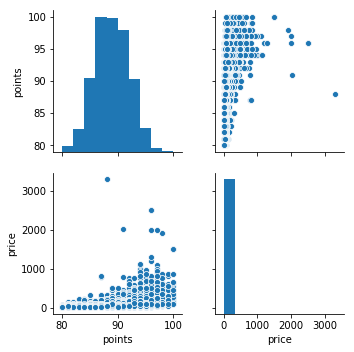

In [107]:
# Visiualizing the "points" and "price" columns to see their distributions and check for potential outliers, 
# which are nicely visible on scattered plots

sns.pairplot(wine)

# The distribution of prices is very skewed. A log transformation can be used to make it more normally distributed.

In [108]:
# I am saving the transformed prices as a new variable in my dataframe

wine['price_log']=np.log(wine['price'])

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([5.7000e+01, 5.5300e+02, 5.6700e+03, 1.8822e+04, 2.2471e+04,
        2.0931e+04, 2.1365e+04, 1.5328e+04, 9.5100e+03, 3.4560e+03,
        1.7000e+03, 4.9100e+02, 3.2300e+02, 1.3600e+02, 1.0200e+02,
        3.9000e+01, 1.1000e+01, 3.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([1.38629436, 1.72206353, 2.0578327 , 2.39360187, 2.72937104,
        3.06514021, 3.40090938, 3.73667855, 4.07244772, 4.40821688,
        4.74398605, 5.07975522, 5.41552439, 5.75129356, 6.08706273,
        6.4228319 , 6.75860107, 7.09437024, 7.43013941, 7.76590858,
        8.10167775]),
 <a list of 20 Patch objects>)

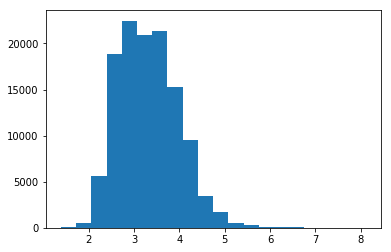

In [111]:
# Plot the histogram of now tranformed "price" variable to see the distribution.
# It now looks like the variable price has a normal distribution, so now I can try and fit a linear regression model.

plt.hist(wine['price_log'],bins=20)

In [112]:
#Checking the correlation of price and points.
wine.corr()

,points,price,price_log
points,1.000000,0.416167,0.611850
price,0.416167,1.000000,0.731005
price_log,0.611850,0.731005,1.000000


In [113]:
# I want to make a basic linear regression. 
# Since variable price doesn’t follow normal distribution on its own, I will use “price_log”

x=(wine['price_log'])
y=wine['points']

In [97]:
import statsmodels.api as sm

In [114]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.832e+06
Date:                Thu, 27 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:46:26   Log-Likelihood:            -5.0306e+05
No. Observations:              120975   AIC:                         1.006e+06
Df Residuals:                  120974   BIC:                         1.006e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_log     25.7832      0.013   1957.469      0.000      25.757      25.809
==============================================================================
Omnibus:                     8658.364   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11726.741
Skew:                          -0.629   Prob(JB):                         0.00
Kurtosis:                       3.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# From the output table it looks like the regression model is good. R-squared and Adj.R-squared are very high, 
# which mean that the model explains high percentage of variance.
# The F-test of overall significance indicates whether linear regression model provides a better fit to the data 
# than a model that contains no independent variables. 
#In my case I have a high F value, which means that my independent variable is statically significant and the null hypothesis 
#(the model with no dependent variables fits the data as well as my model) is not confirmed, 
#because my independent variable is making a model better.


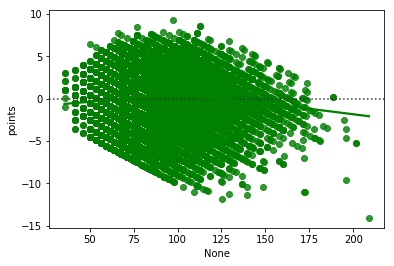

In [115]:
sns.residplot(predictions, y, lowess=True, color="g")

# The residuals pretty symmetrically distributed, being tightly grouped together.

In [33]:
# I want to get a chunk of data, where the wine has very high score and visualise it.

wine_with_high_score=wine.loc[ wine['points'] > 95]

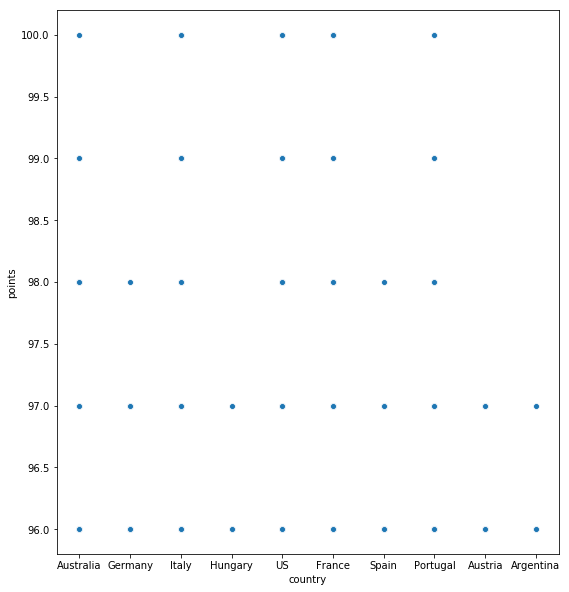

In [72]:
# First, I want to see which countries have the highest score, thus are producing the best wine.

plt.figure(figsize=(9,10))
sns.scatterplot(x=wine_with_high_score['country'], y=wine_with_high_score['points'])

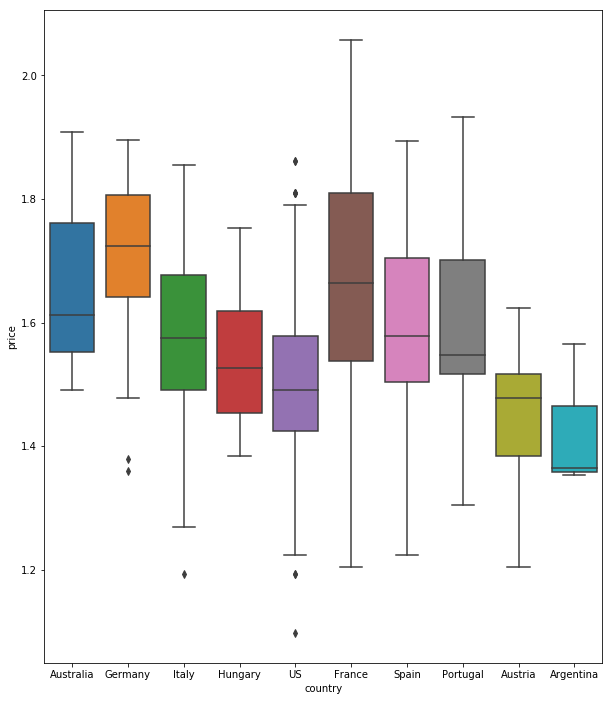

In [116]:
# Here I'm in looking at the distribution of prices in the countries, that produce the best wine.
# Box plot gives a good understanding of how the data is distributed, in this case - how the pricing is distributed across those 
# countries. 
# I did looked up the code in the kaggle kernel 

plt.figure(figsize=(10,12))
sns.boxplot(x=wine_with_high_score['country'], y=wine_with_high_score['price'])

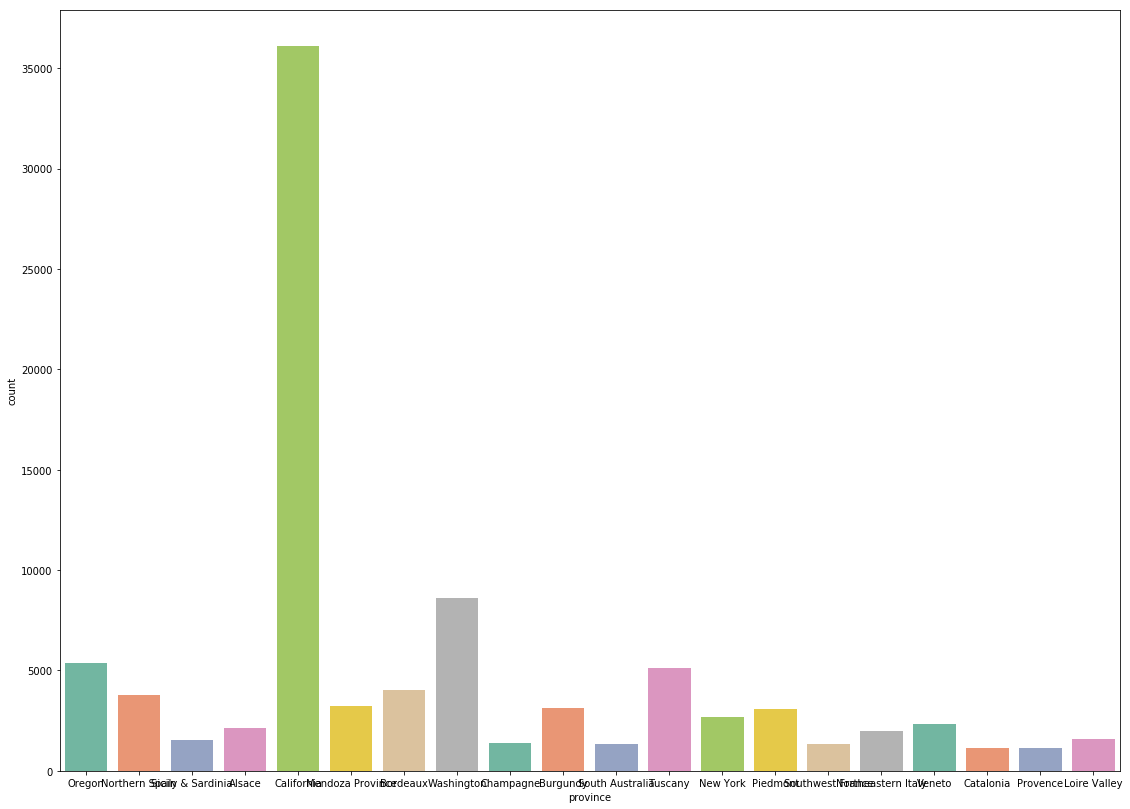

In [59]:
# Here I decided to look at the top 20 provinces, from which the most wines come. Here I also looked up the code at kaggle. 

plt.figure(figsize=(19,14))
wine.province.value_counts()[:20]
provinces = wine['province'].value_counts()[:20]
sns.countplot(x='province', 
                  data=wine.loc[(wine.province.isin(provinces.index.values))],
                 palette='Set2')

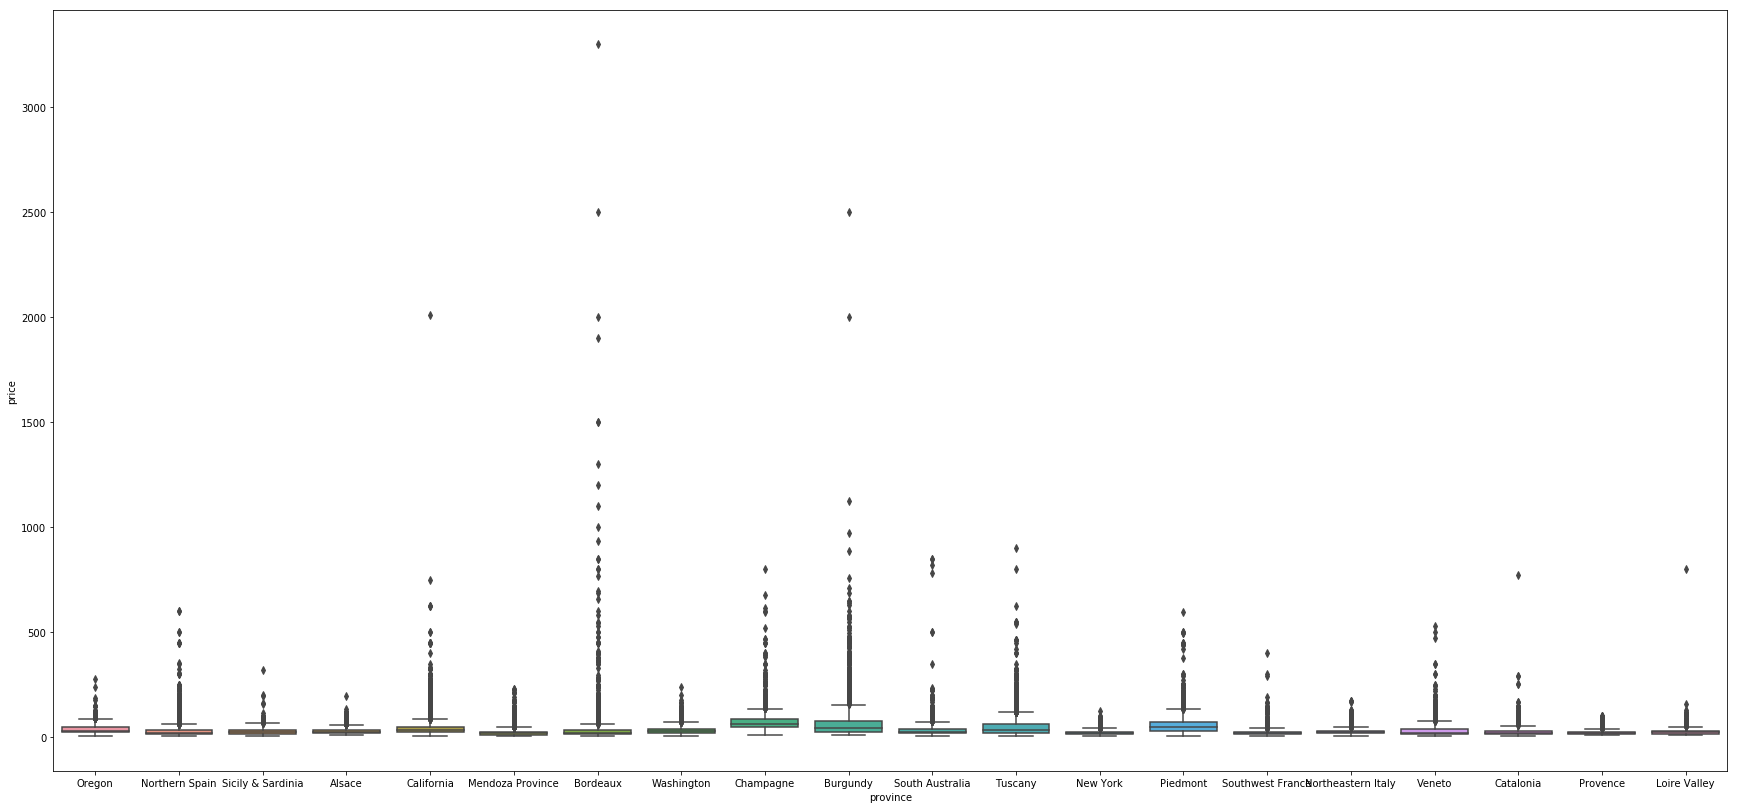

In [117]:
# Visualizing the distribution of price (obviously not the transformed variable). As expected, the distribution is 
# skewed, there are lots of outliers. 
# looks like even in top 20 provinces we can find quite inexpensive wine.

plt.figure(figsize=(30,14))
sns.boxplot(x='province', y='price', data=wine.loc[(wine.province.isin(provinces.index.values))])

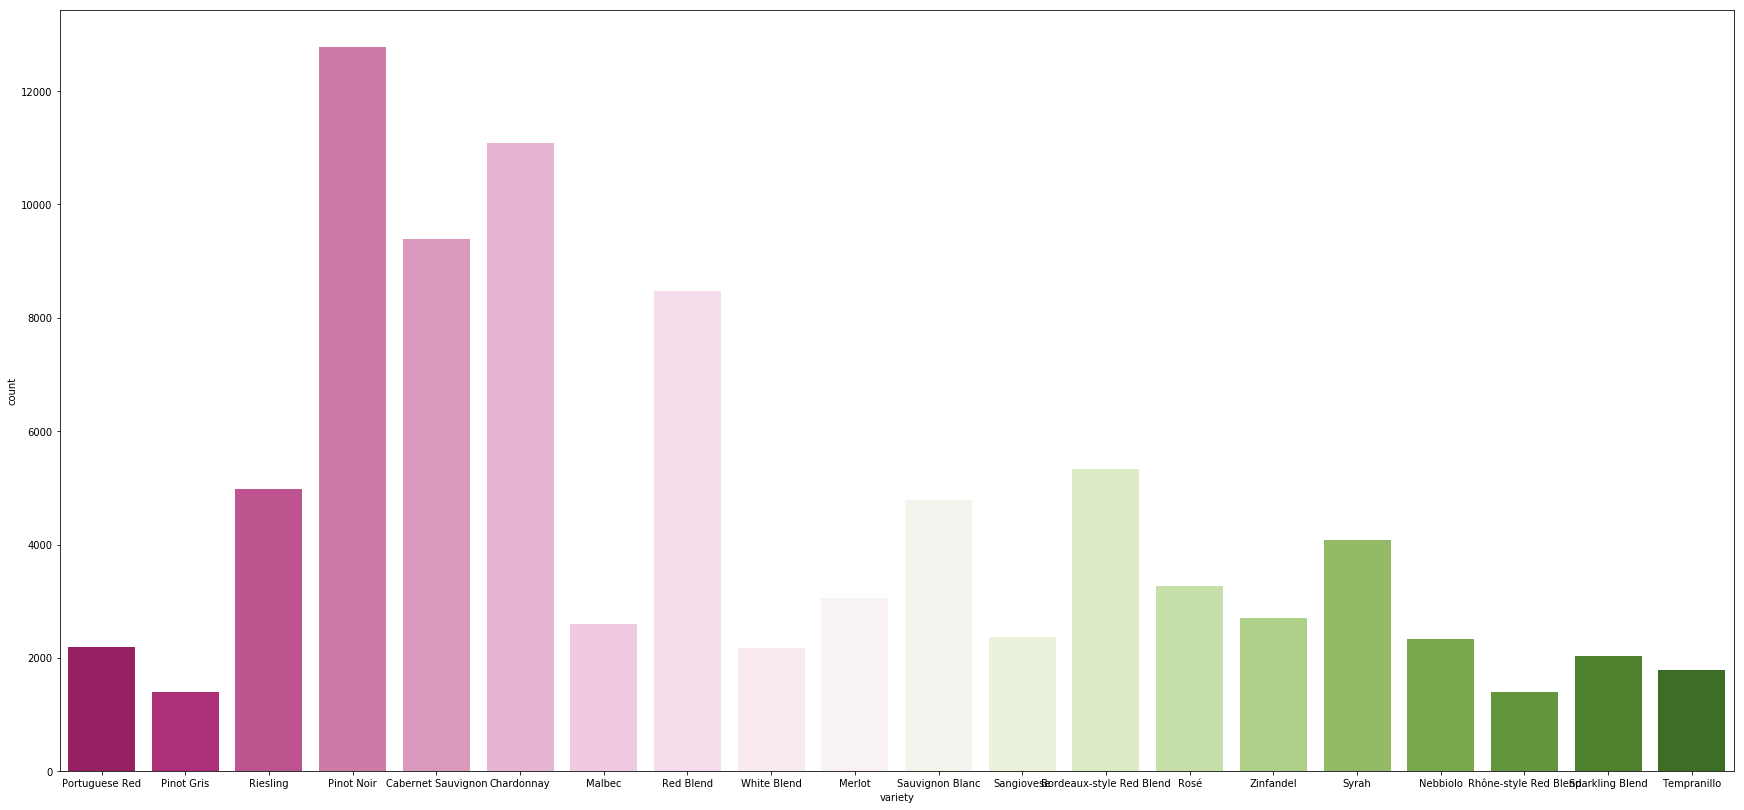

In [89]:
# Here I am looking at top 30 varieties of wine, so that I know what to buy for the upcoming New Year’s holidays. 

plt.figure(figsize=(30,14))
wine.variety.value_counts()[:20]
varieties = wine['variety'].value_counts()[:20]
sns.countplot(x='variety', 
                  data=wine.loc[(wine.variety.isin(varieties.index.values))],
                 palette="PiYG")

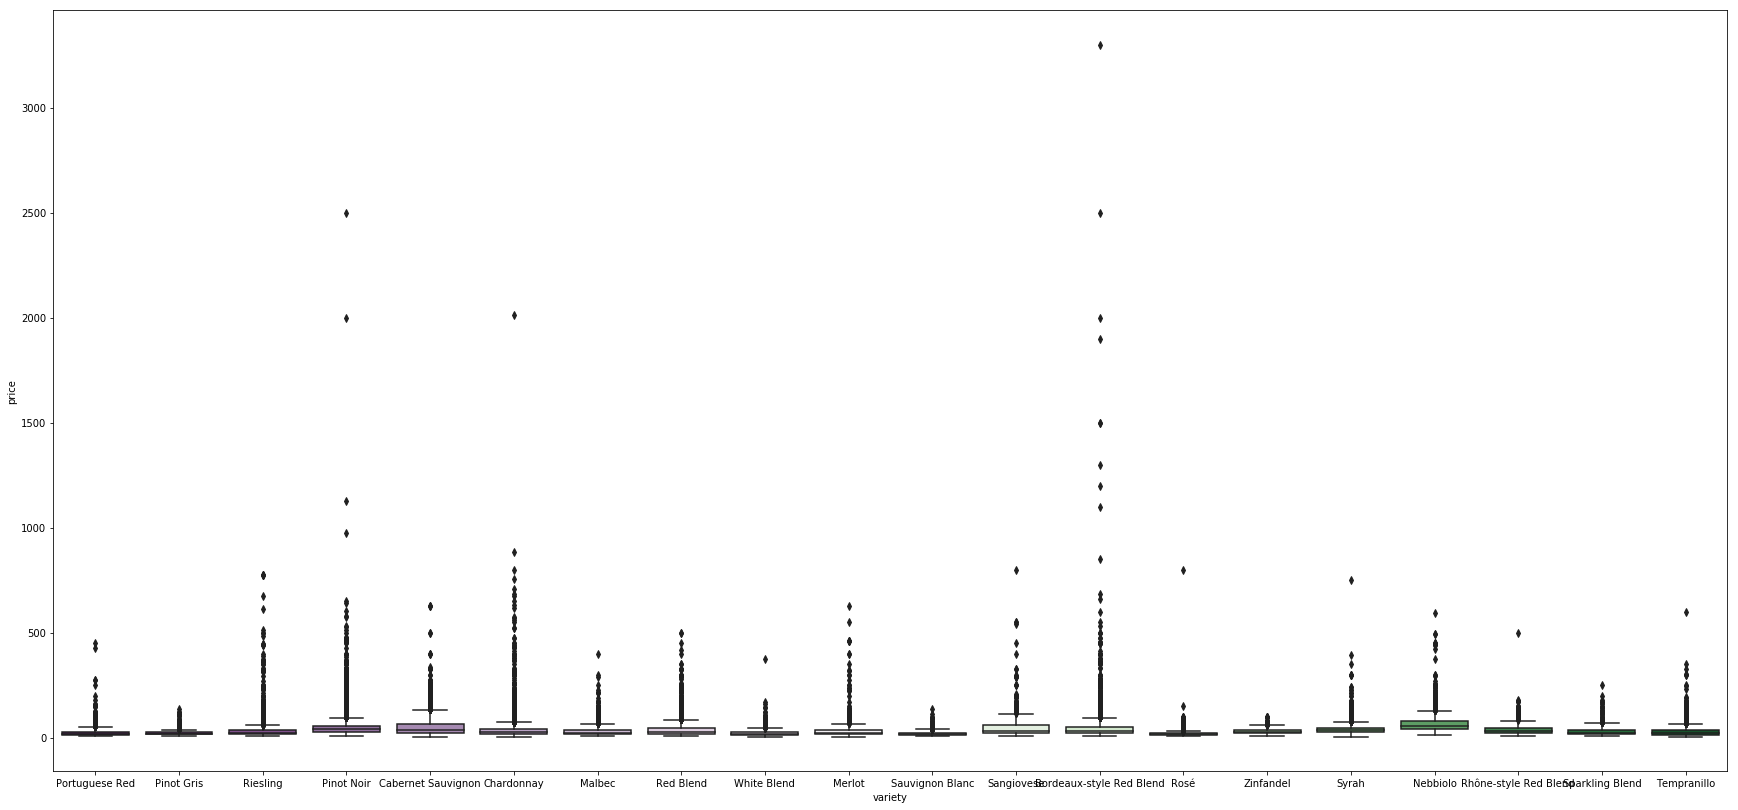

In [118]:
# And of course I want to see the pricing for those top 30 varieties. 

plt.figure(figsize=(30,14))
sns.boxplot(x='variety', y='price', data=wine.loc[(wine.variety.isin(varieties.index.values))], palette="PRGn")

In [ ]:
# I want to do some very basic text processing (cleaning + word cloud)

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [ ]:
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Take a look at the decriprtion of the #1 wine before any clean up. 

# IMPORTANT NOTE! I do know some basis of what to do with cleaning the text. My experience in text processing is not that big and
# I did it in RStudio. Thus I DID USE code, that was posted on kaggle (https://www.kaggle.com/akatsuki06/basic-text-processing-cleaning-the-description)

wine['description'][1]

In [ ]:
# First, I removed all the signs of punctuation and numbers from the text

import re
description =  re.sub('[^a-zA-Z]',' ',wine['description'][1])
description

In [ ]:
description = description.lower()

description

In [ ]:
#convert string to a list of words
description_words = description.split() 
#iterate over each word and include it if it is not stopword 
description_words = [word for word in description_words if not word in stopwords.words('english')]

description_words

In [ ]:
# Stemming the words. It narrows the words down to their root, thus it helps to have less diffrences in words. 

ps = PorterStemmer()
description_words=[ps.stem(word) for word in description_words]
description_words

In [ ]:
wine['description'][0]=' '.join(description_words)
wine['description'][0]

In [ ]:
# Performing all the clean up steps for the rest of the text in the 'description' column

stopword_list = stopwords.words('english')
ps = PorterStemmer()
for i in range(1,len(wine['description'])):
    description = re.sub('[^a-zA-Z]',' ',wine['description'][i])
    description = description.lower()
    description_words = description.split()
    description_words = [word for word in description_words if not word in stopword_list]
    description_words = [ps.stem(word) for word in description_words]
    wine['description'][i] = ' '.join(description_words)

In [ ]:
wine['description']

In [ ]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# I created a word cloud from the description column to see, which words are mostly used in the reviews. 
# It gives a good view of most frequent words. 
# I did also see on the internet some suggestions to remove words like “drink, wine, flavor”, 
# so I’m going to use this advice to see, what will word cloud show. 



wordcloud = WordCloud(max_words=100, background_color="white").generate(' '.join(wine['description']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

In [ ]:
# The image gives an idea of the most frequent words after very obvious “drink”/”flavor”. 
# I thought that word cloud can be useful in understanding of what a typical wine review can consist of.
# Looks like it’s a lot of thing regarding the fruity or berry notes and some other flavors. 
# Maybe if I ever want to write a wine review, this word cloud might help me along the way


wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(' '.join(wine['description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()